In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the random seed for reproducibility
seed = 42


<>:23: SyntaxWarning: invalid escape sequence '\m'
<>:23: SyntaxWarning: invalid escape sequence '\m'
C:\Users\nadav\AppData\Local\Temp\ipykernel_31516\54413571.py:23: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_title("Wright-Fisher model with DFE\n $s_i $~ $TN(\mu=s, \sigma=s/5, left=0.5s, right=1.5s)$")


Text(0.5, 1.0, 'Wright-Fisher model with DFE\n $s_i $~ $TN(\\mu=s, \\sigma=s/5, left=0.5s, right=1.5s)$')

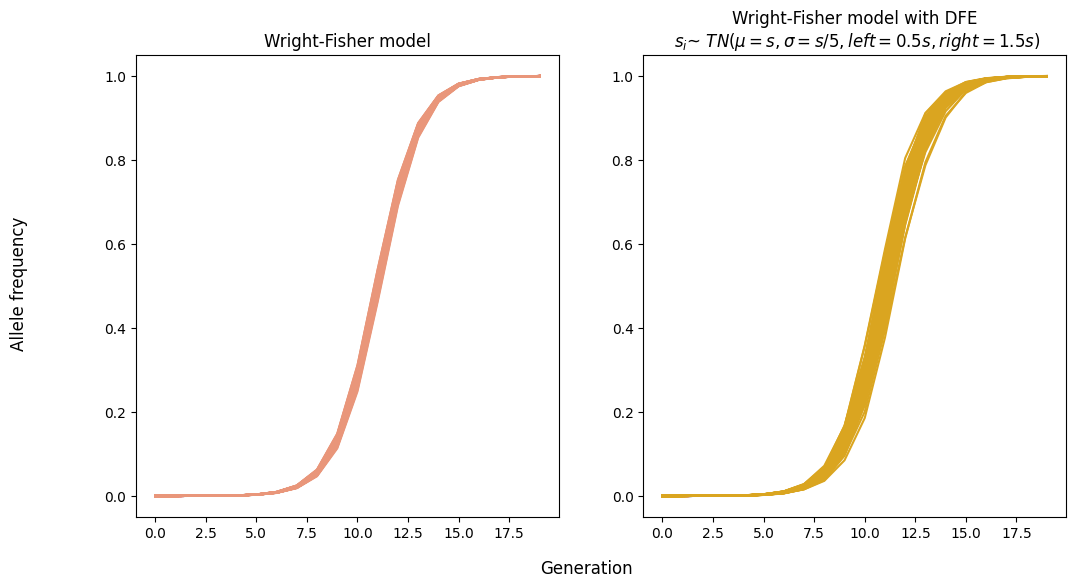

In [6]:
from models import WF_DFE, WF
import scipy.stats as stats
from inference_utils import get_dist

# Set the parameters
N = int(1e8)
s = 0.1
mu = 1e-6
G = 200

dist = get_dist(s)
# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    dfe = WF_DFE(mu, N, G, dist, seed=None) # Run the DFE model
    ax[0].plot(np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G//10), dfe, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("Wright-Fisher model")
ax[1].set_title("Wright-Fisher model with DFE\n $s_i $~ $TN(\mu=s, \sigma=s/5, left=0.5s, right=1.5s)$")

Text(0.5, 1.0, 'WF model + frequency-dependent selection\n$s(p) = 7p(1-p)\\cdot s$')

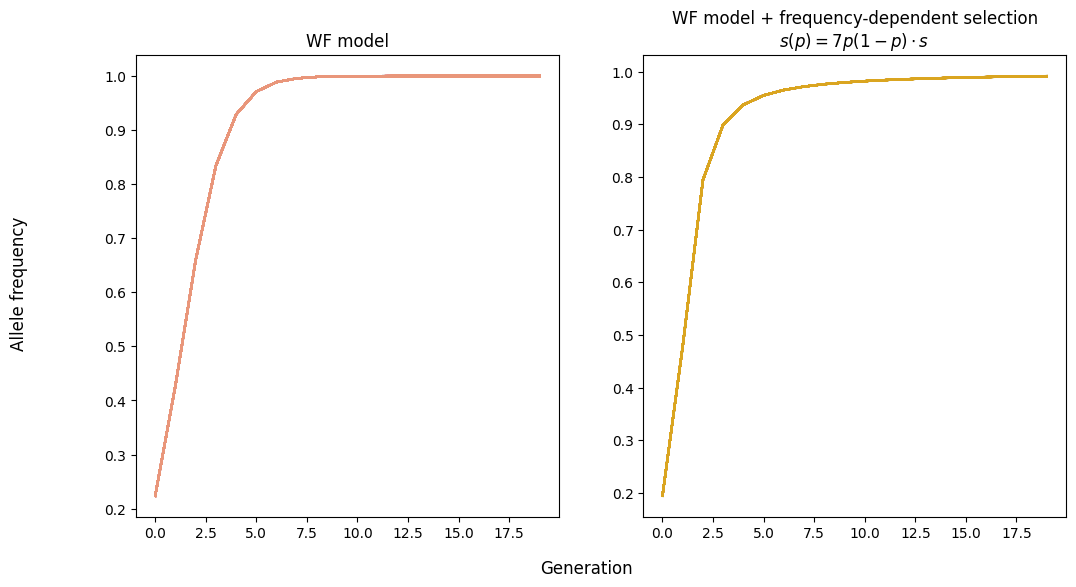

In [7]:
from models import WF_FD

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

alpha = 7

for i in range(100):
    wf = WF(s, mu, N, G, seed=None, p_init=0.1) # Run the basic WFmodel
    fd = WF_FD(s, mu, N, G, seed=None, p_init=0.1, alpha = alpha) # Run the DFE model
    ax[0].plot(np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G//10), fd, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title(f"WF model + frequency-dependent selection\n$s(p) = {alpha}p(1-p)\\cdot s$")

Text(0.5, 1.0, 'WF model + bottlenecks\nevery 10 generations to 0.001N')

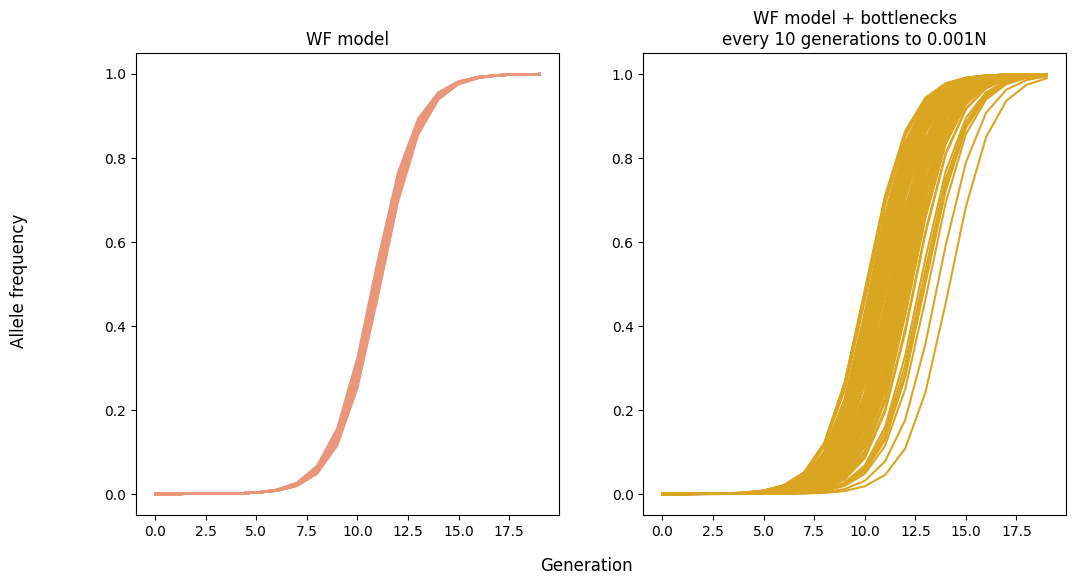

In [8]:
from models import WF_bottleneck

# Plot the results  
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
bottlenecks = [10*(i+1) for i in range(G//10)]
N_bottleneck = N//1000
bot_dict = {b: N_bottleneck for b in bottlenecks}

for i in range(100):
    wf = WF(s, mu, N, G, seed=None) # Run the basic WFmodel
    fd = WF_bottleneck(s, mu, N, G, bot_dict, seed=None) # Run the bottleneck model
    ax[0].plot(np.arange(G//10), wf, color='darksalmon') # Plot the allele frequency
    ax[1].plot(np.arange(G//10), fd, color='goldenrod') # Plot the allele frequency
fig.supxlabel("Generation")
fig.supylabel("Allele frequency")
ax[0].set_title("WF model")
ax[1].set_title("WF model + bottlenecks\nevery 10 generations to 0.001N")